# PeriodicBuffer - Unit Cell RDF
The `PeriodicBuffer` class is meant to replicate points beyond a single image while respecting box periodicity. This example demonstrates how we can use this to compute the radial distribution function from a sample crystal's unit cell.

In [1]:
%matplotlib inline
import freud
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from util import box_2d_to_points

Here, we create a box to represent the unit cell and put two points inside. We plot the box and points below.

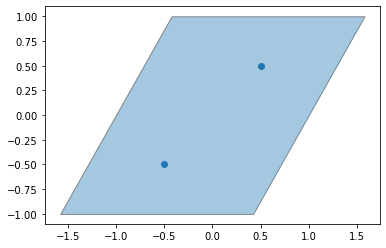

In [2]:
box = freud.box.Box(Lx=2, Ly=2, xy=np.sqrt(1/3), is2D=True)
points = np.asarray([[-0.5, -0.5, 0], [0.5, 0.5, 0]])
corners = box_2d_to_points(box)
ax = plt.gca()
box_patch = plt.Polygon(corners[:, :2])
patch_collection = matplotlib.collections.PatchCollection([box_patch], edgecolors='black', alpha=0.4)
ax.add_collection(patch_collection)
plt.scatter(points[:, 0], points[:, 1])
plt.show()

Next, we create a `PeriodicBuffer` instance and have it compute the "buffer" points that lie outside the first periodicity. These positions are stored in the `buffer_positions` attribute. The corresponding `buffer_ids` array gives a mapping from the index of the buffer particle to the index of the particle it was replicated from, in the original array of `points`. Finally, the `buffer_box` attribute returns a larger box, expanded from the original box to contain the replicated points.

In [3]:
pbuff = freud.box.PeriodicBuffer()
pbuff.compute((box, points), 6, images=True)
print(pbuff.buffer_points[:10], '...')

[[ 0.65470022  1.5         0.        ]
 [ 1.80940032  3.5         0.        ]
 [ 2.96410179  5.5         0.        ]
 [-3.96410131 -6.5         0.        ]
 [-2.80940104 -4.49999952  0.        ]
 [-1.65470016 -2.50000048  0.        ]
 [ 1.50000024 -0.5         0.        ]
 [ 2.65470076  1.5         0.        ]
 [ 3.80940032  3.5         0.        ]
 [ 4.96410179  5.5         0.        ]] ...


Below, we plot the original unit cell and the replicated buffer points and buffer box.

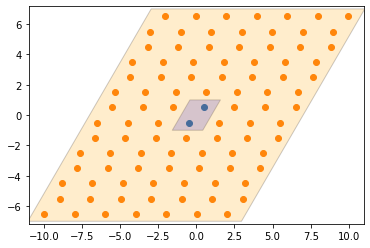

In [4]:
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(pbuff.buffer_points[:, 0], pbuff.buffer_points[:, 1])
box_patch = plt.Polygon(corners[:, :2])
buff_corners = box_2d_to_points(pbuff.buffer_box)
buff_box_patch = plt.Polygon(buff_corners[:, :2])
patch_collection = matplotlib.collections.PatchCollection(
    [box_patch, buff_box_patch], facecolors=['blue', 'orange'],
    edgecolors='black', alpha=0.2)
plt.gca().add_collection(patch_collection)
plt.show()

Finally, we can plot the radial distribution function (RDF) of this replicated system, using a value of `rmax` that is larger than the size of the original box. This allows us to see the interaction of the original points in `ref_points` with their replicated neighbors from the buffer in `points`.

In [6]:
rdf = freud.density.RDF(bins=250, r_max=5)
rdf.compute((pbuff.buffer_box, pbuff.buffer_points), points)
rdf.plot()

AttributeError: 'freud.density.RDF' object has no attribute 'R'